# # Gender--1,2
# Age-- 20,25
# Companion--0,1
# Employment--1-5
## 1--DS
## 2--AI
## 3--DA
## 4--MLOPS
## 5--DE
# TWO_FOUR_WHEELER--(0,1)
#  CINEMA_LIKES --(1-3)
## 1--ROMANTIC
## 2--ACTION
## 3--ALL



In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [30]:
a=pd.read_excel("C:\\Users\\sowmy\\OneDrive\\Documents\\own data.xlsx")

In [31]:
df=pd.DataFrame(a)
a

,ID,Gender,age,married,Employment,two_four_wheeler,Cinema_likes,Money
0,1,1,23,0,2.0,0,1.0,100000.0
1,2,0,22,1,4.0,1,3.0,779905.0
2,3,0,22,1,5.0,1,2.0,509817.0
3,4,0,23,1,2.0,1,1.0,623511.0
4,5,0,24,1,3.0,0,2.0,730207.0
...,...,...,...,...,...,...,...,...
995,996,1,25,1,2.0,0,2.0,658093.0
996,997,1,25,0,4.0,1,1.0,881255.0
997,998,0,23,0,1.0,1,2.0,542747.0
998,999,1,23,1,1.0,0,2.0,702694.0


In [32]:
df.duplicated().sum()

4

In [33]:
df=df.drop_duplicates()

In [34]:
df.shape

(996, 8)

In [35]:
df.dtypes

ID                    int64
Gender                int64
age                   int64
married               int64
Employment          float64
two_four_wheeler      int64
Cinema_likes        float64
Money               float64
dtype: object

In [36]:
columns_with_missing_values=df.columns[df.isnull().any()]

df[columns_with_missing_values].isnull().sum()

Employment      3
Cinema_likes    1
Money           1
dtype: int64

plotting null values in graph

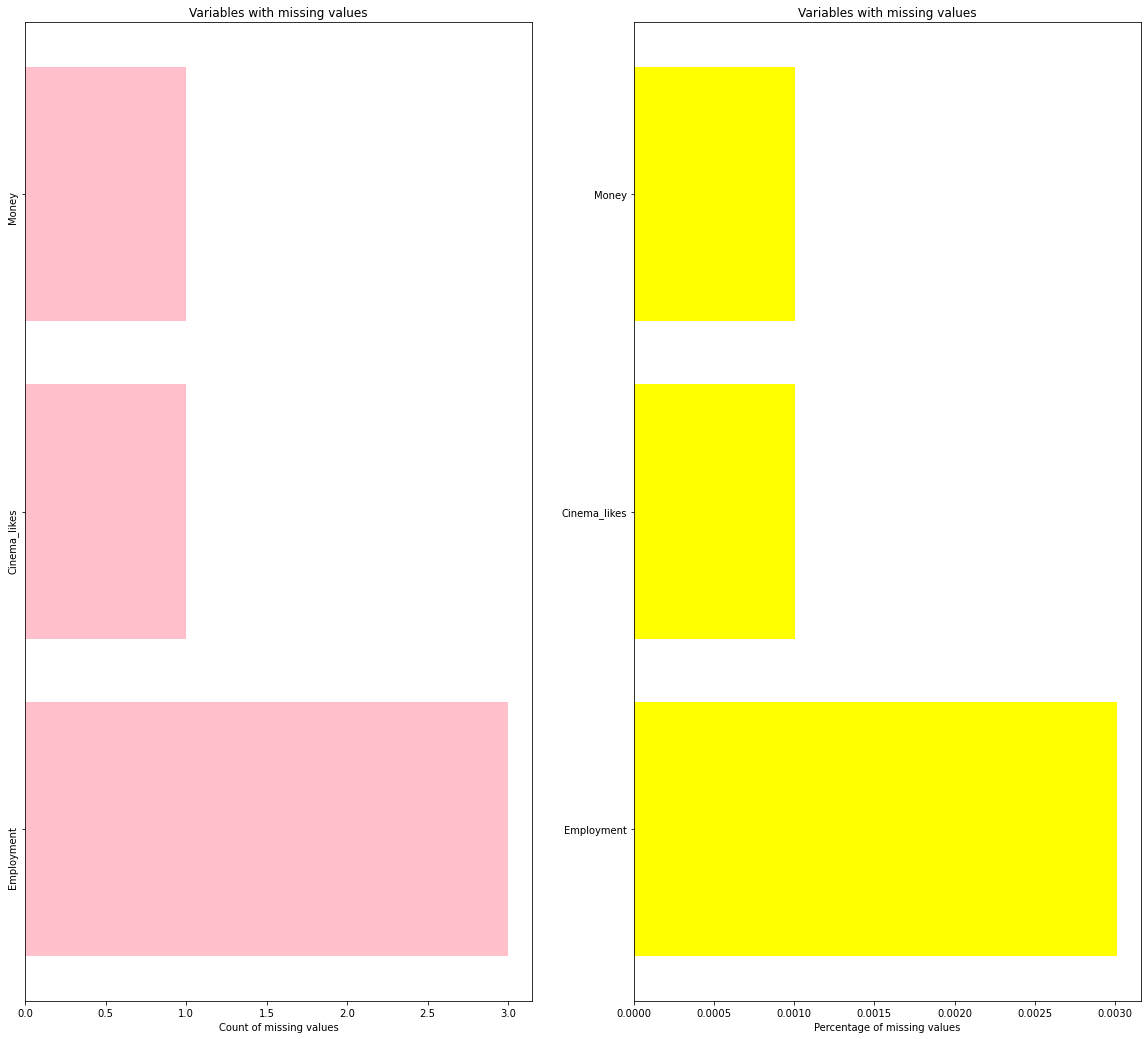

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
# To hold variable names
labels = [] 

# To hold the count of missing values for each variable 
valuecount = [] 

# To hold the percentage of missing values for each variable
percentcount = [] 

for col in columns_with_missing_values:
    labels.append(col)
    valuecount.append(df[col].isnull().sum())
    percentcount.append(df[col].isnull().sum()/df.shape[0])
    
ind = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,18))

rects = ax1.barh(ind, np.array(valuecount), color='pink')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='vertical')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values");

rects = ax2.barh(ind, np.array(percentcount), color='yellow')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values");

In [38]:
df.isnull().sum()

ID                  0
Gender              0
age                 0
married             0
Employment          3
two_four_wheeler    0
Cinema_likes        1
Money               1
dtype: int64

In [39]:
df['Employment'].fillna((df['Employment'].mean()), inplace=True)
df['Cinema_likes'].fillna((df['Cinema_likes'].mean()), inplace=True)
df['Money'].fillna((df['Money'].mean()), inplace=True)
df.isnull().sum()

ID                  0
Gender              0
age                 0
married             0
Employment          0
two_four_wheeler    0
Cinema_likes        0
Money               0
dtype: int64

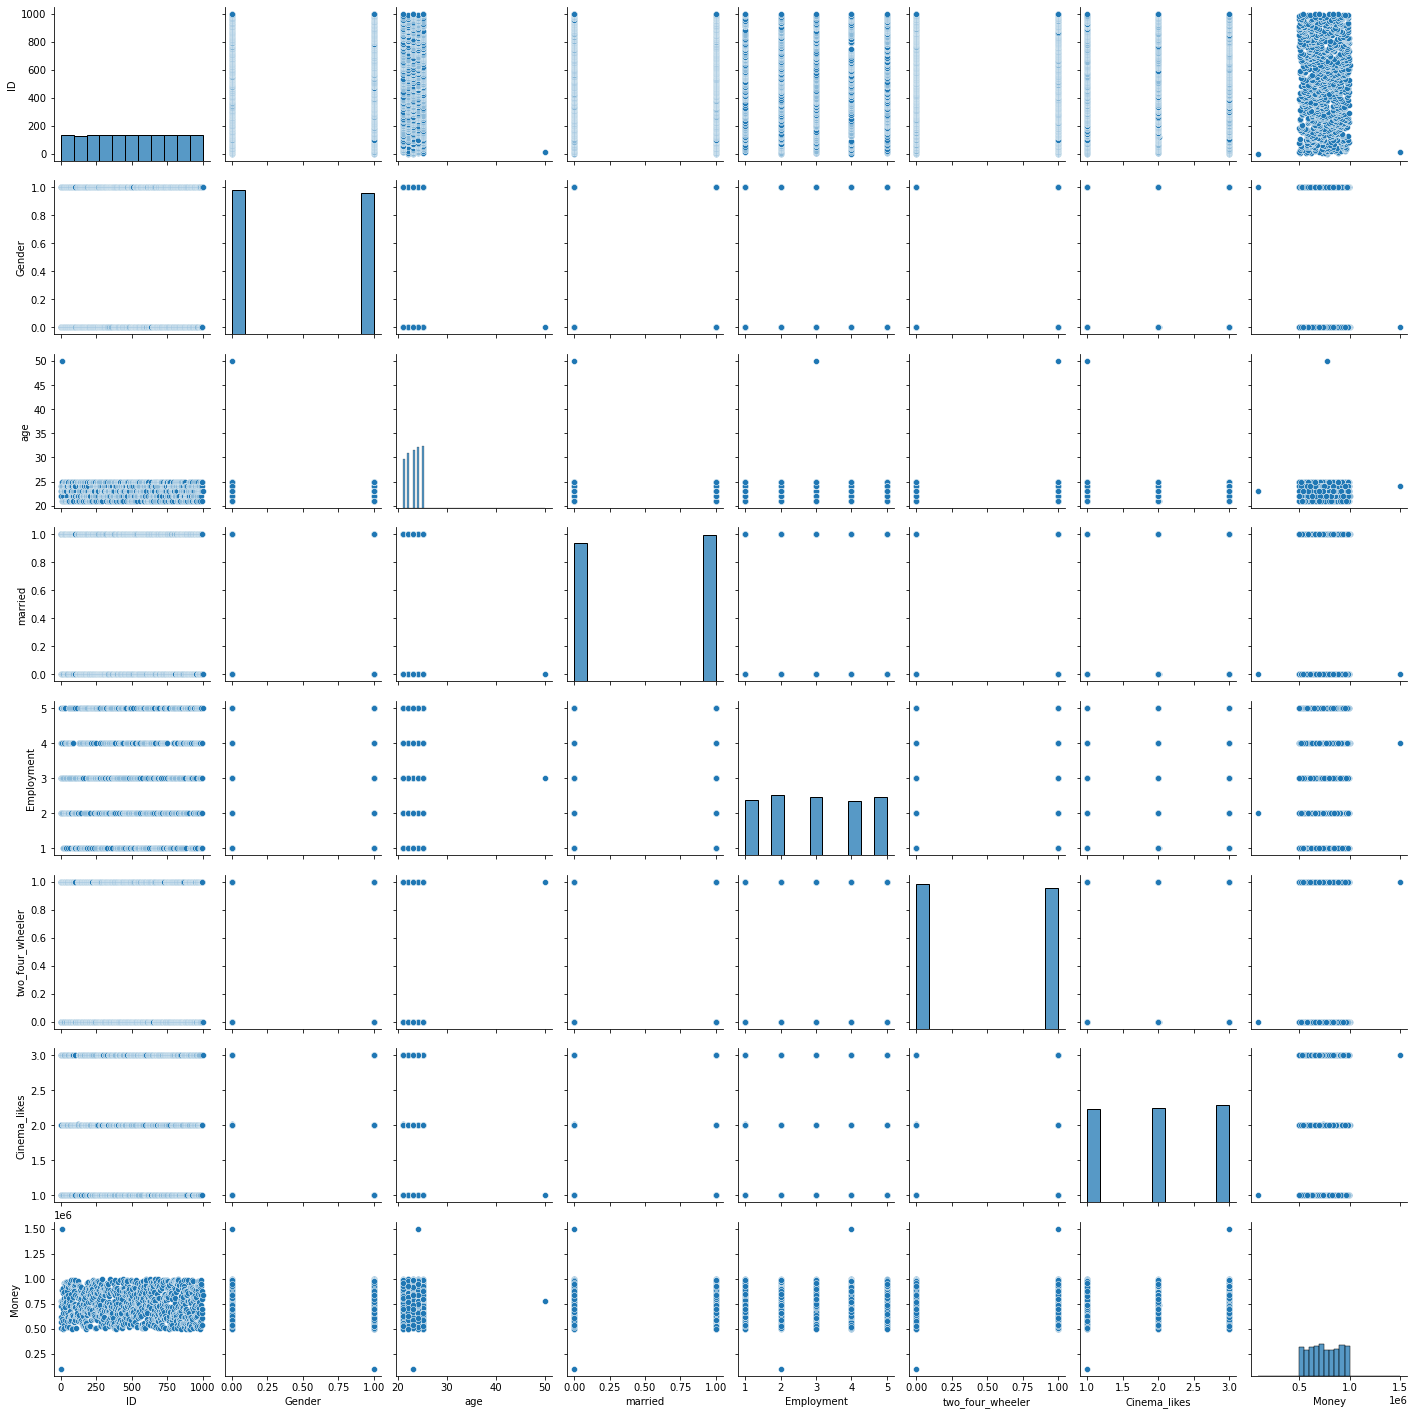

In [40]:
import seaborn as sns
sns.pairplot(df,kind='scatter')

outliers checking

In [42]:
df.columns

Index(['ID', 'Gender', 'age', 'married', 'Employment', 'two_four_wheeler',
       'Cinema_likes', 'Money'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9fc34be20>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9fc358580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9fc34ba90>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9fc358ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9fc365070>],
 'means': []}

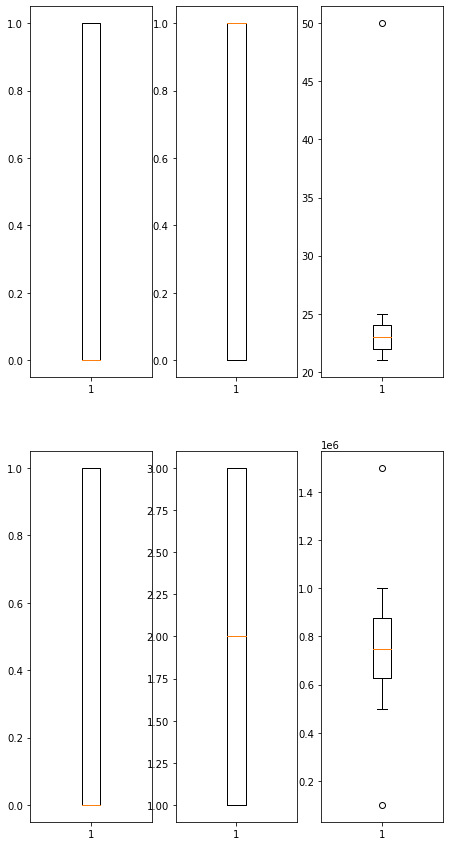

In [61]:
fig,ax=plt.subplots(2,3,figsize=(10,15))
plt.subplot(2,4,1)
plt.boxplot(df['Gender'])
plt.subplot(2,4,2)
plt.boxplot(df['married'])
plt.subplot(2,4,3)
plt.boxplot(df['age'])
plt.subplot(2,4,5)
plt.boxplot(df['two_four_wheeler'])
plt.subplot(2,4,6)
plt.boxplot(df['Cinema_likes'])
plt.subplot(2,4,7)
plt.boxplot(df['Money'])

In [66]:
p0=df.age.min()
p100=df.age.max()

q1=df.age.quantile(0.25)
q2=df.age.quantile(0.5)
q3=df.age.quantile(0.75)
iqr=q3-q1
iqr

2.0

In [63]:
lower_cutoff=q1-1.5*iqr
lower_cutoff

19.0

In [64]:
upper_cutoff=q3+1.5*iqr
upper_cutoff

27.0

DROPPING OUTLIRES

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9fc96f220>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9fc96f970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9fc95fe50>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9fc97d0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9fc97d460>],
 'means': []}

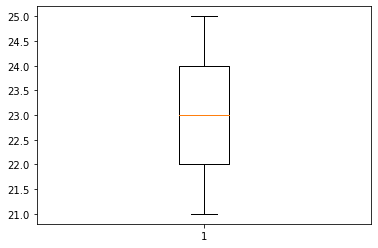

In [73]:
df.drop(df[ (df.age > upper_cutoff) | (df.age < lower_cutoff) ].index , inplace=True)
plt.boxplot(df['age'])

In [76]:
p0=df.Money.min()
p100=df.Money.max()

q1=df.Money.quantile(0.25)
q2=df.Money.quantile(0.5)
q3=df.Money.quantile(0.75)
iqr=q3-q1
lower_cutoff=q1-1.5*iqr
upper_cutoff=q3+1.5*iqr


{'whiskers': [<matplotlib.lines.Line2D at 0x1e9fc9d5be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9fc9e7340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9fc9d5820>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9fc9e7a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9fc9e7df0>],
 'means': []}

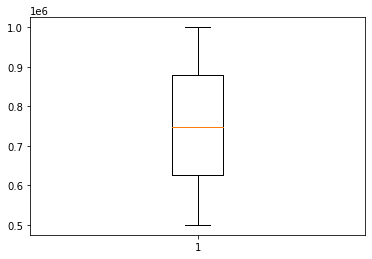

In [77]:
df.drop(df[ (df.Money > upper_cutoff) | (df.Money < lower_cutoff) ].index , inplace=True)
plt.boxplot(df['Money'])

# Thus we get the clean data set with zero null values and no duplicates and also without outliers